# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

Импорт библиотек и модулей

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

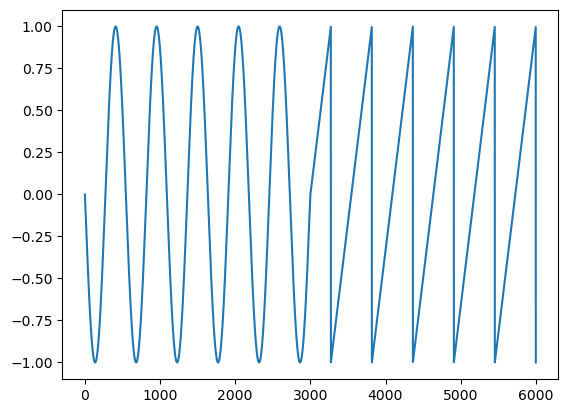

In [3]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [4]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


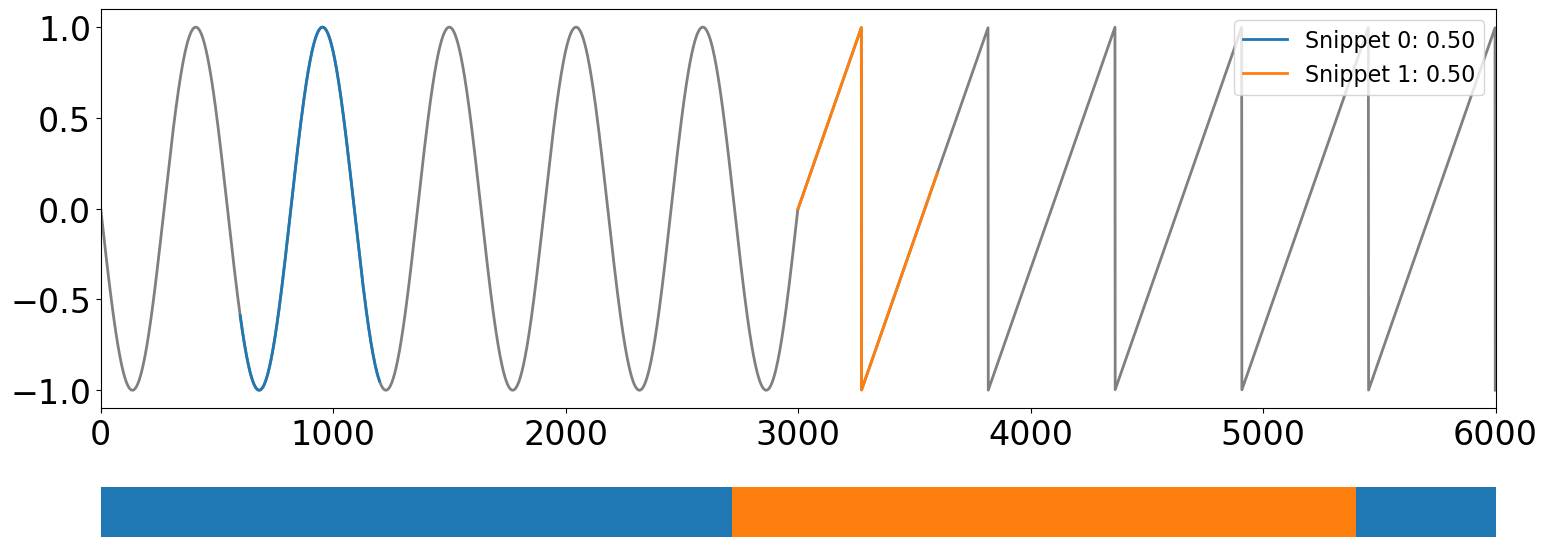

<Axes: >

In [5]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

Min timestamp: -23.9094, Max timestamp: 505.71
Total data points: 20
Filtered data points: 17


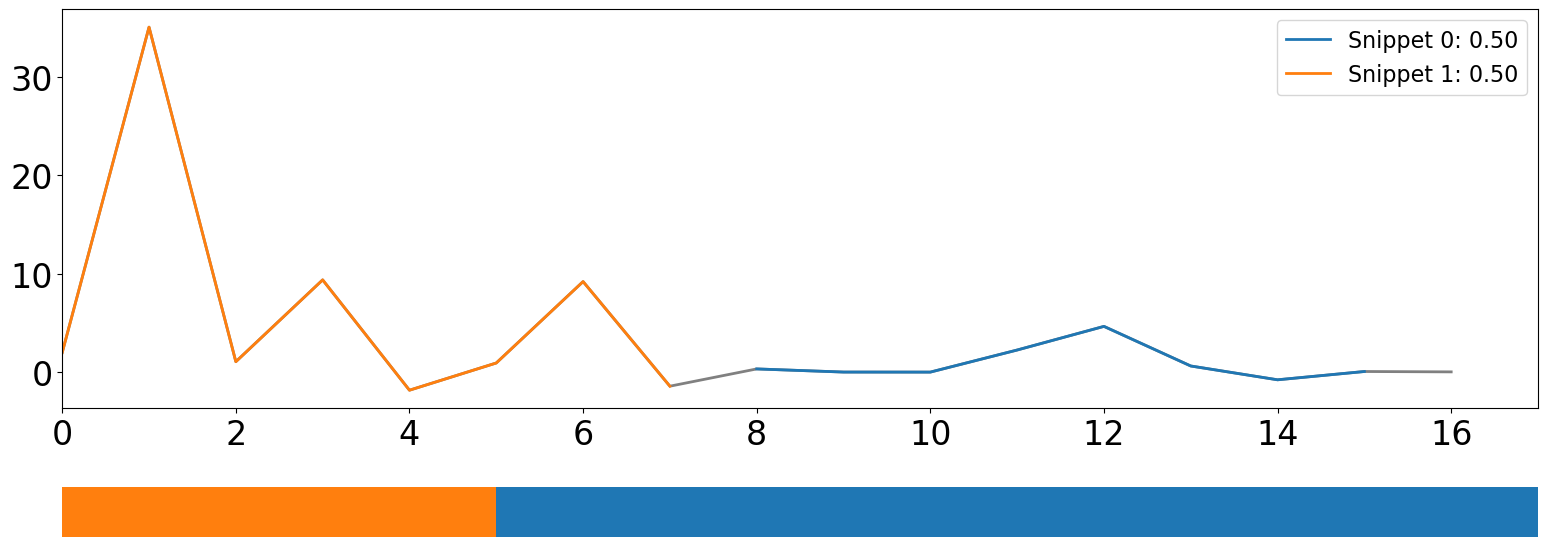

<Axes: >

In [10]:
import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt

# Функция для визуализации сниппетов
def plot_snippets(ts, snippets):
    with plt.rc_context(
        {
            "lines.linewidth": 2,
            "font.size": 24,
        }
    ):
        fig, (ax_main, ax_labels) = plt.subplots(
            2, figsize=(16, 6), gridspec_kw={"height_ratios": [16, 2]}
        )
        color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

        ax_main.plot(ts, color="gray")

        m = len(snippets[0][0])  # Длина сниппетов
        snippets_indices = snippets[1]
        for i, snippet_start in enumerate(snippets_indices):
            snippet_end = snippet_start + m
            ax_main.plot(
                np.arange(snippet_start, snippet_end),
                ts[snippet_start:snippet_end],
                c=color_cycle[i],
                label=f"Snippet {i}: {snippets[3][i]:.2f}",
            )

        labels = np.zeros_like(ts)
        snippets_regimes = snippets[5]
        for regime in snippets_regimes:
            labels[regime[1]:regime[2]] = regime[0]

        img = ax_labels.imshow([range(len(color_cycle))], cmap="tab10", aspect="auto")
        img.set_data([labels])

        ax_main.set_xlim(0, len(ts))
        ax_labels.axis("off")
        ax_main.legend(prop={"size": 16}, loc="upper right")
        plt.tight_layout()
        plt.show()

    return ax_main

# Загрузка данных
data_url = './datasets/PAMAP/PAMAP.txt'
df = pd.read_csv(data_url, sep=' ', header=None)

# Проверьте, загружены ли данные
if df.empty:
    raise ValueError("DataFrame is empty. Please check the file path or contents.")

# Извлечение временных меток (предполагаем, что первая колонка – это временные метки)
timestamps = df[0] 

# Проверьте временные метки
print(f"Min timestamp: {timestamps.min()}, Max timestamp: {timestamps.max()}")

# Извлечение показаний гироскопа на оси Y (например, предполагаем, что гироскоп Y находится в колонке 4)
gyroscope_y = df[4]

# Проверьте размер данных
print(f"Total data points: {len(gyroscope_y)}")

# Установите корректные временные границы
start_time = -23  # Начало интервала (в пределах минимума)
end_time = 500    # Конец интервала (в пределах максимума)

# Фильтрация: выбираем только те значения, которые попадают в указанный интервал
filtered_indices = (timestamps >= start_time) & (timestamps <= end_time)
filtered_data = gyroscope_y[filtered_indices].to_numpy()

# Проверьте длину отфильтрованных данных
print(f"Filtered data points: {len(filtered_data)}")

# Проверьте, имеет ли отфильтрованный массив данные перед его использованием
if len(filtered_data) == 0:
    raise ValueError("No data points found in the specified time range. Please check the start and end times.")

# Установите корректный размер окна m
m = min(600, len(filtered_data) // 2)  # Устанавливаем m до max 600 или в два раза меньше length

# Поиск сниппетов
snp = stumpy.snippets(filtered_data, m=m, k=2, percentage=0.5)

# Визуализация результатов
plot_snippets(filtered_data, snp)


Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [26]:
import numpy as np
import pandas as pd

# Загрузка данных
ts_url = './datasets/PAMAP/pamap.txt'

# Чтение файла с использованием пробелов в качестве разделителей
data = pd.read_csv(ts_url, header=None, delim_whitespace=True)

# Assuming last column has activity labels
activities = data.iloc[:, -1].to_numpy()  # Activity labels
ts = data.iloc[:, :-1].to_numpy().flatten()  # Time series data without the last column

# Getting unique activity labels for reference
activity_labels = np.unique(activities)
print(f'Unique activity labels: {activity_labels}')

# Checking lengths and for NaN values
print(f'Original data length: {len(ts)}')
print(f'Original activities length: {len(activities)}')

# Checking for NaN values
if np.any(np.isnan(ts)):
    print("Data contains NaN values. Cleaning up...")

# Filtering: Keep only positive values and valid data points
valid_indices = ~np.isnan(ts) & (ts > 0)  # Get indices for valid (non-NaN and positive) data
filtered_data = ts[valid_indices]  # Filtered data

# Get the length of the filtered data
filtered_length = len(filtered_data)

# Determine sample rate assuming activities are sampled evenly
activity_count = len(activities)
sample_rate = len(ts) // activity_count  # Assume regular intervals for these activity labels

# List of filtered activities based on valid data points
filtered_activities = []
for i in range(filtered_length):
    # Calculate which activity corresponds to the current index
    activity_index = (np.where(valid_indices)[0][i]) // sample_rate
    if activity_index < len(activities):  # Check to avoid index out of bounds
        filtered_activities.append(activities[activity_index])

filtered_activities = np.array(filtered_activities)  # Convert to numpy array

# Check lengths of filtered arrays
print(f'Length of filtered data: {len(filtered_data)}')
print(f'Length of filtered activities: {len(filtered_activities)}')

# Final check to ensure lengths match
if len(filtered_data) != len(filtered_activities):
    raise ValueError("Filtered data and activity labels lengths do not match.")

print("Data and activity filtering completed successfully.")


Unique activity labels: [-5.15058e+01 -1.20268e+01 -6.78469e-01 -3.42133e-01 -3.40155e-01
 -3.19678e-01 -1.71433e-01 -1.02927e-01  6.04161e-02  2.01760e-01
  5.66066e-01  1.21798e+00  1.44976e+00  4.00000e+00  5.32511e+00
  5.60004e+00  2.13508e+01  3.56875e+01  2.30570e+03          nan]
Original data length: 2919980
Original activities length: 20
Data contains NaN values. Cleaning up...


KeyboardInterrupt: 

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

In [54]:
import numpy as np
import pandas as pd
from scipy.stats import mode

# Загрузка данных
ts_url = './datasets/PAMAP/pamap.txt'
data = pd.read_csv(ts_url, header=None, delim_whitespace=True)

# Предполагаем, что данных гироскопа по колонкам используются последние три столбца
gyro_x = data.iloc[:, -3].to_numpy()  # X
gyro_y = data.iloc[:, -2].to_numpy()  # Y
gyro_z = data.iloc[:, -1].to_numpy()  # Z

# Выделение меток активности (предполагаем, что метки в предпоследнем столбце)
activities = data.iloc[:, -4].to_numpy()  # Предполагаем, что метки активности в предпоследнем столбце

# Удаление возможных NaN значений
valid_indices = ~np.isnan(gyro_x) & ~np.isnan(gyro_y) & ~np.isnan(gyro_z) & ~np.isnan(activities)
gyro_x = gyro_x[valid_indices]
gyro_y = gyro_y[valid_indices]
gyro_z = gyro_z[valid_indices]
activities = activities[valid_indices]

# Проверка размерности данных после фильтрации
print(f'Количество доступных данных после фильтрации: {len(gyro_x)}')
print(f'Первоначальные метки активности: {np.unique(activities)}')

# Параметры окон
window_size = 10  # Уменьшено для примера
step_size = 5     # Шаг передвижения окна

# Проверка, достаточно ли данных для создания окон
if len(gyro_x) < window_size:
    raise ValueError("Доступной длины данных недостаточно для создания заданного размера окна.")

# Инициализация списков для временных окон и меток
windowed_labels = []

# Создание временных окон
for start in range(0, len(gyro_x) - window_size + 1, step_size):
    end = start + window_size
    window_labels = activities[start:end]
    windowed_labels.append(window_labels)

# Применение голосования большинством для меток в каждом окне
final_labels = []

for labels in windowed_labels:
    if len(labels) > 0:  # Проверка, что метки не пусты
        most_common_label = mode(labels)

        # Извлечение наиболее частой метки с проверкой
        if most_common_label.count > 0:  # Проверяем, есть ли хотя бы одна метка
            final_labels.append(most_common_label.mode[0])  # Добавляем наиболее частую метку
        else:
            final_labels.append(np.nan)  # В случае, если нет популярной метки
    else:
        final_labels.append(np.nan)  # В случае пустого окна добавим NaN

# Преобразование в массив numpy и вывод
final_labels = np.array(final_labels)
print(f'Итоговые метки для каждого окна: {final_labels}')


Количество доступных данных после фильтрации: 19
Первоначальные метки активности: [-5.17445e+01 -1.25264e+01 -6.75315e-01 -5.01649e-01 -3.45593e-01
 -3.21443e-01 -1.35921e-01 -4.19921e-02  1.03945e-01  2.21546e-01
  5.66736e-01  2.01519e+00  2.02739e+00  4.00000e+00  6.56647e+00
  6.94196e+00  2.06436e+01  3.56875e+01  2.30567e+03]


IndexError: invalid index to scalar variable.

In [49]:
print('Window Labels:', labels)
print('Most Common Label:', most_common_label)


Window Labels: [ 2.30567e+03  4.00000e+00  3.56875e+01  2.02739e+00  6.56647e+00
 -1.35921e-01  2.01519e+00  6.94196e+00 -4.19921e-02  2.21546e-01]
Most Common Label: ModeResult(mode=-0.135921, count=1)


Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [10]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [11]:
# INSERT YOUR CODE

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [12]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?